# Chromosome ideograms

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')

%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

import geneinfo as gi
from geneinfo.plot import chrom_ideogram, GenomeIdeogram, ChromIdeogram
#gi.email('your@email.com')

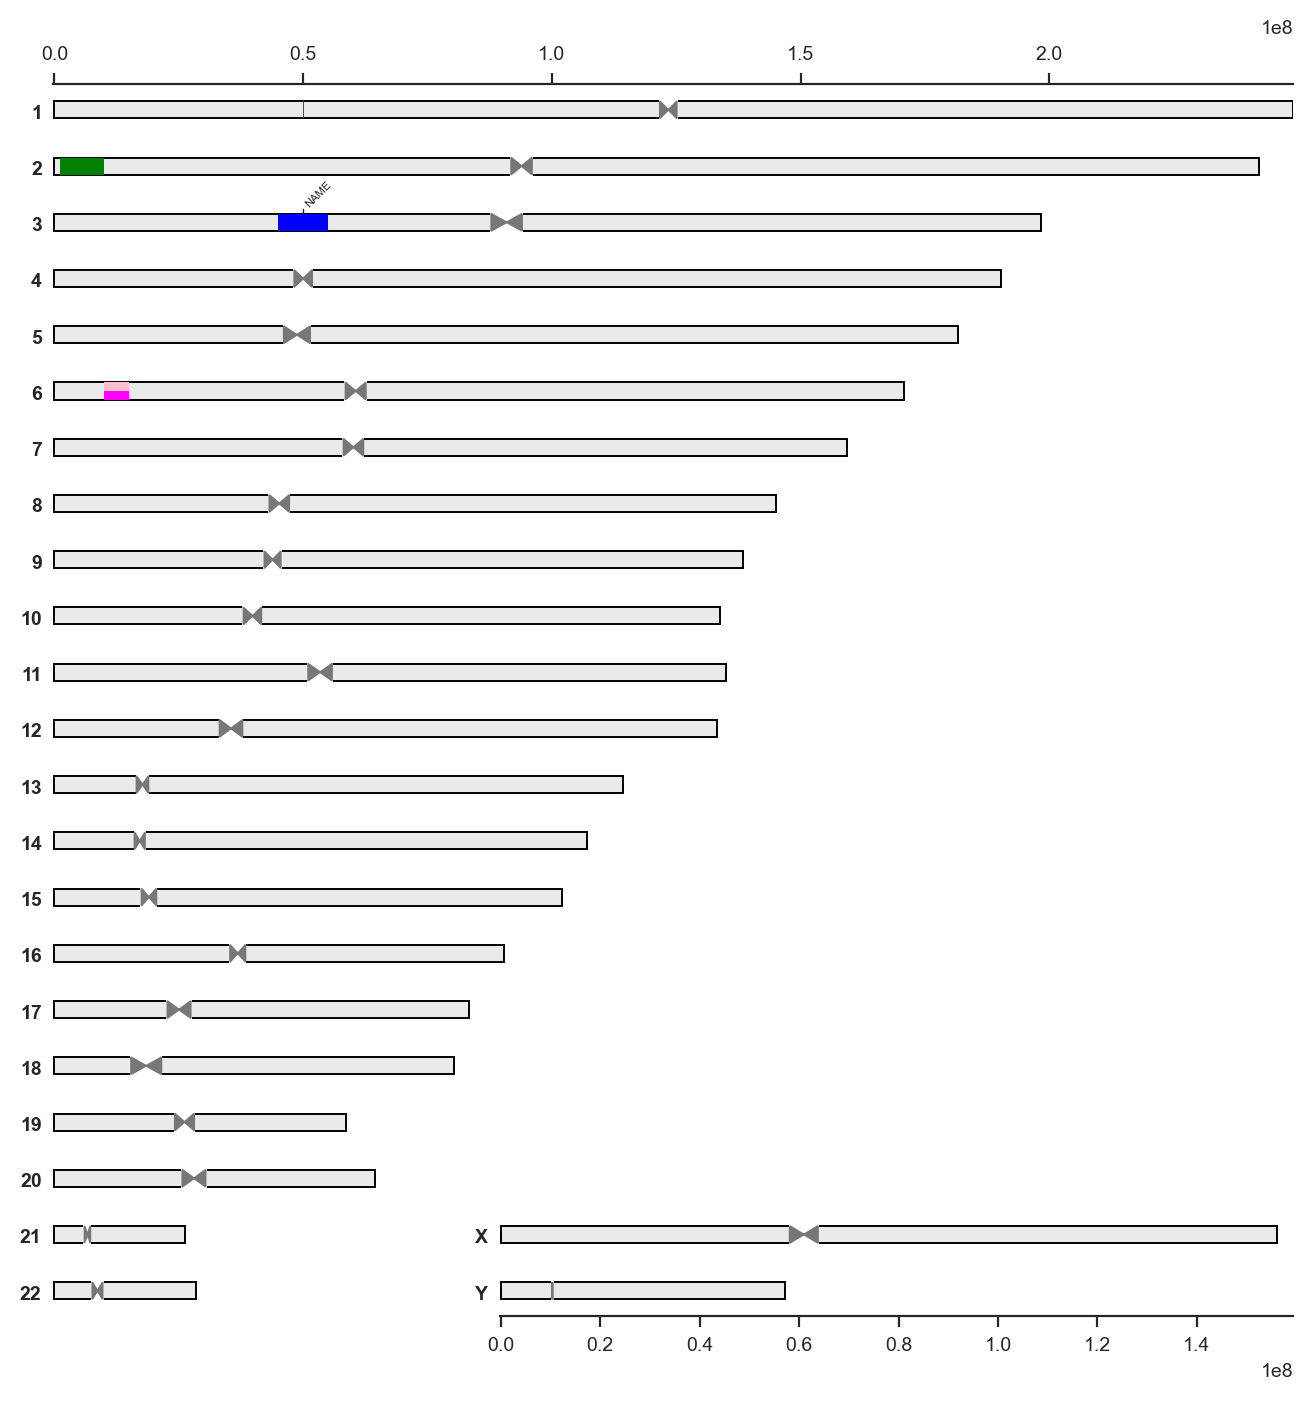

In [2]:
annotation = [
    ('chr1', 50000000, 50001000),                          # segment color defaults to red
    ('chr2', 10000000, 1000000, 'green'),                  # with segment color
    ('chr3', 45000000, 55000000, 'blue', 'NAME'),          # with name label
    ('chr6', 10000000, 15000000, 'magenta', None, 0, 0.5), # with base and height
    ('chr6', 10000000, 15000000, 'pink', None, 0.5, 0.5),  # with base and height
]

chrom_ideogram(annotation, figsize=(8, 8)) ;

To make sure segments are visible on the plot, the default minimal size of plotteed segments are 200000. This can be changed like this (notice how the chr1 segment is no longer visible):

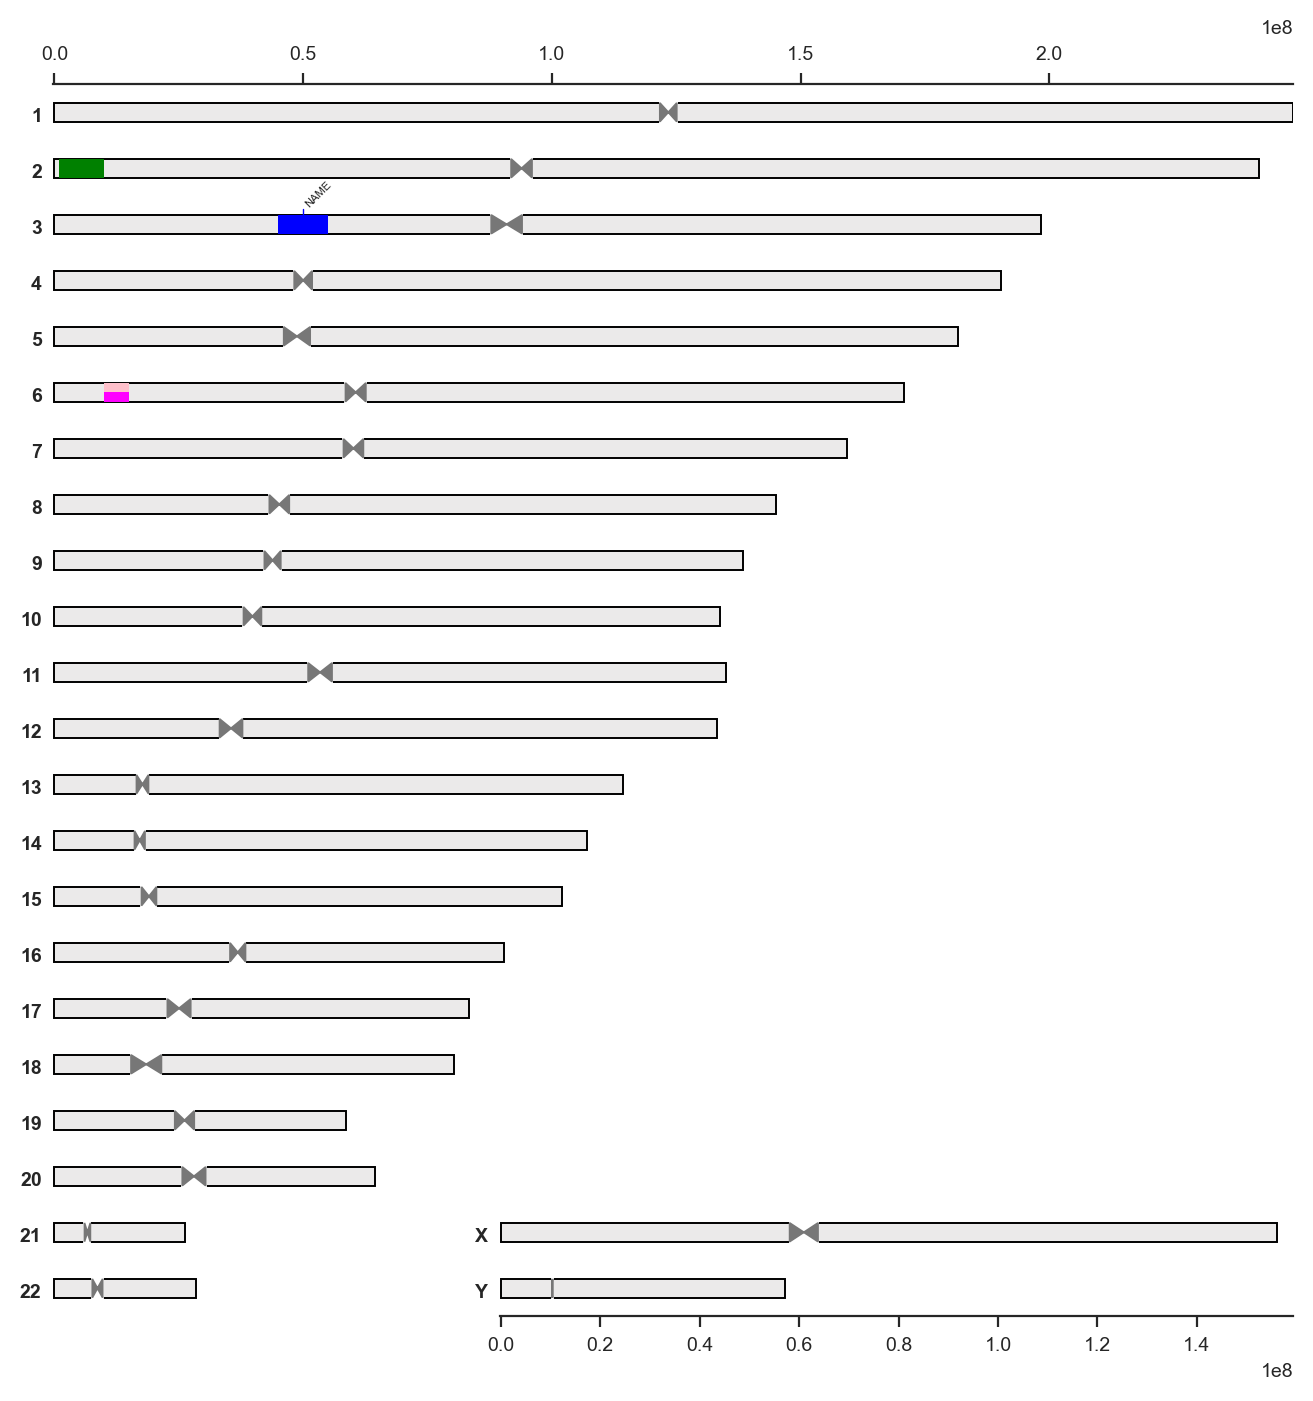

In [3]:
chrom_ideogram(annotation, figsize=(8, 8), min_visible_width=1, hspace=0)

Other assembly, figure dimentions:

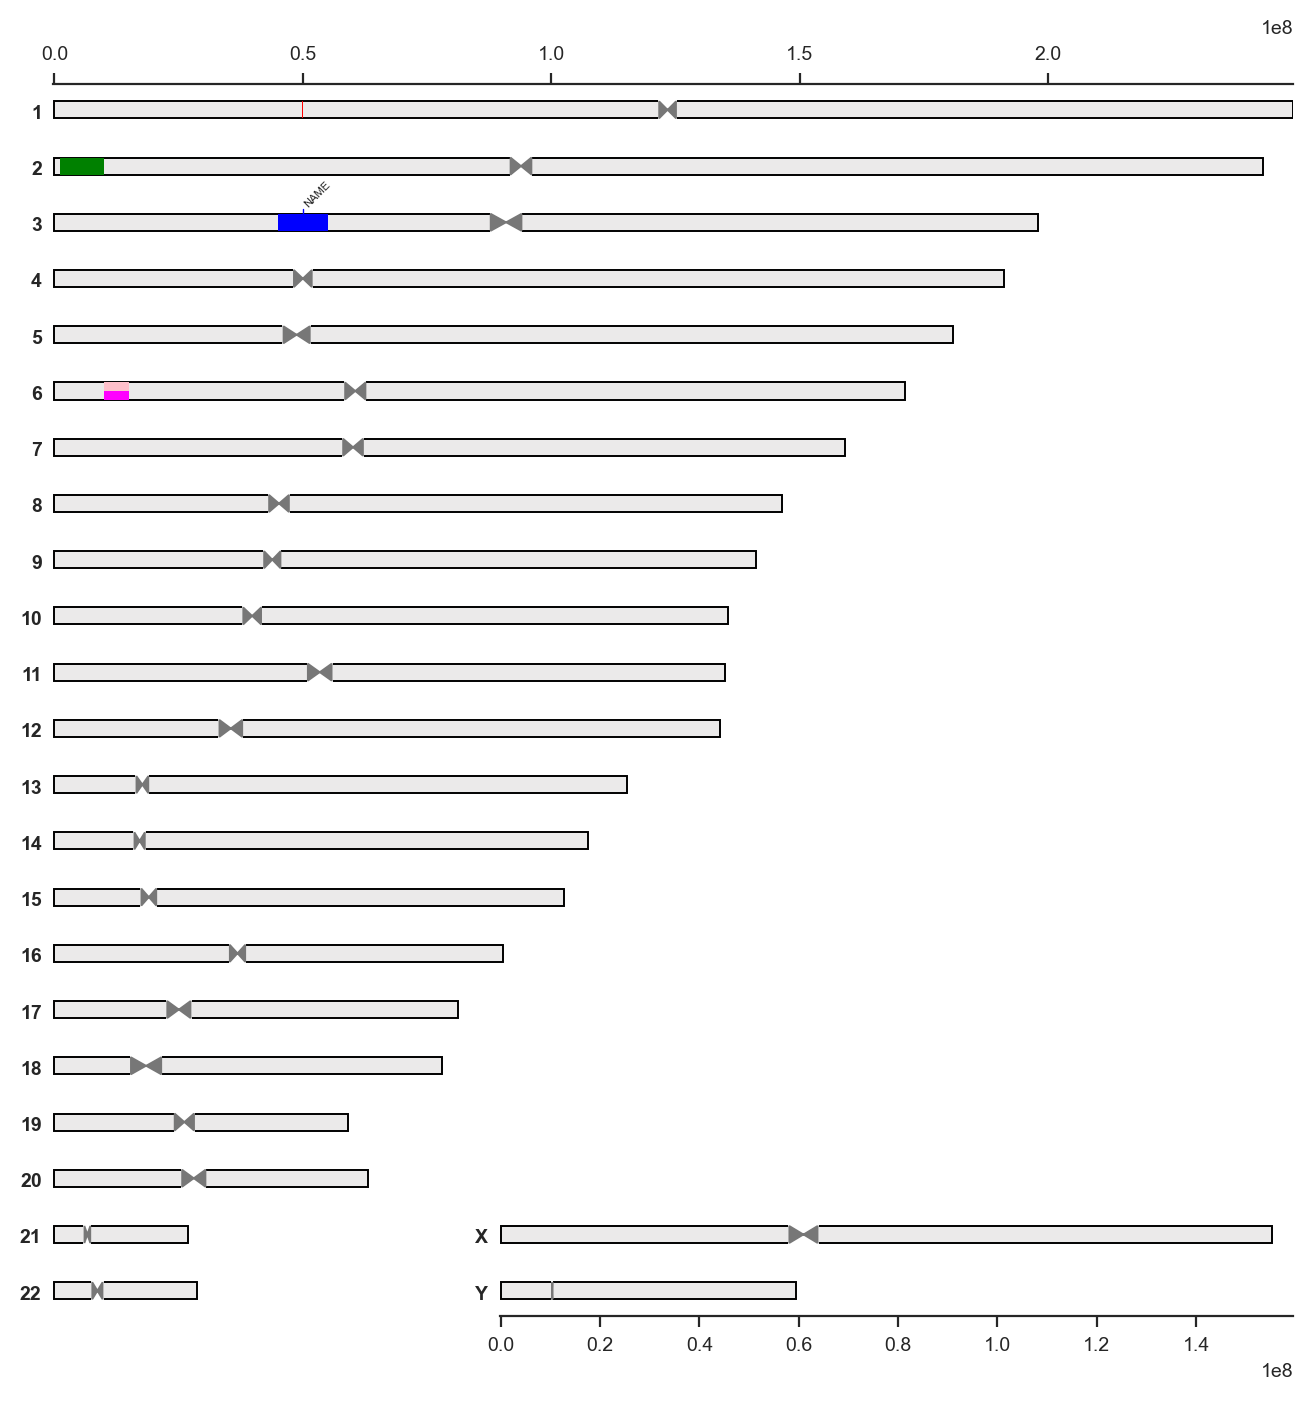

In [4]:
chrom_ideogram(annotation, assembly='hg19', figsize=(8, 8))

**You can add position markers along a chromosome like this to better see the location of some segments:**

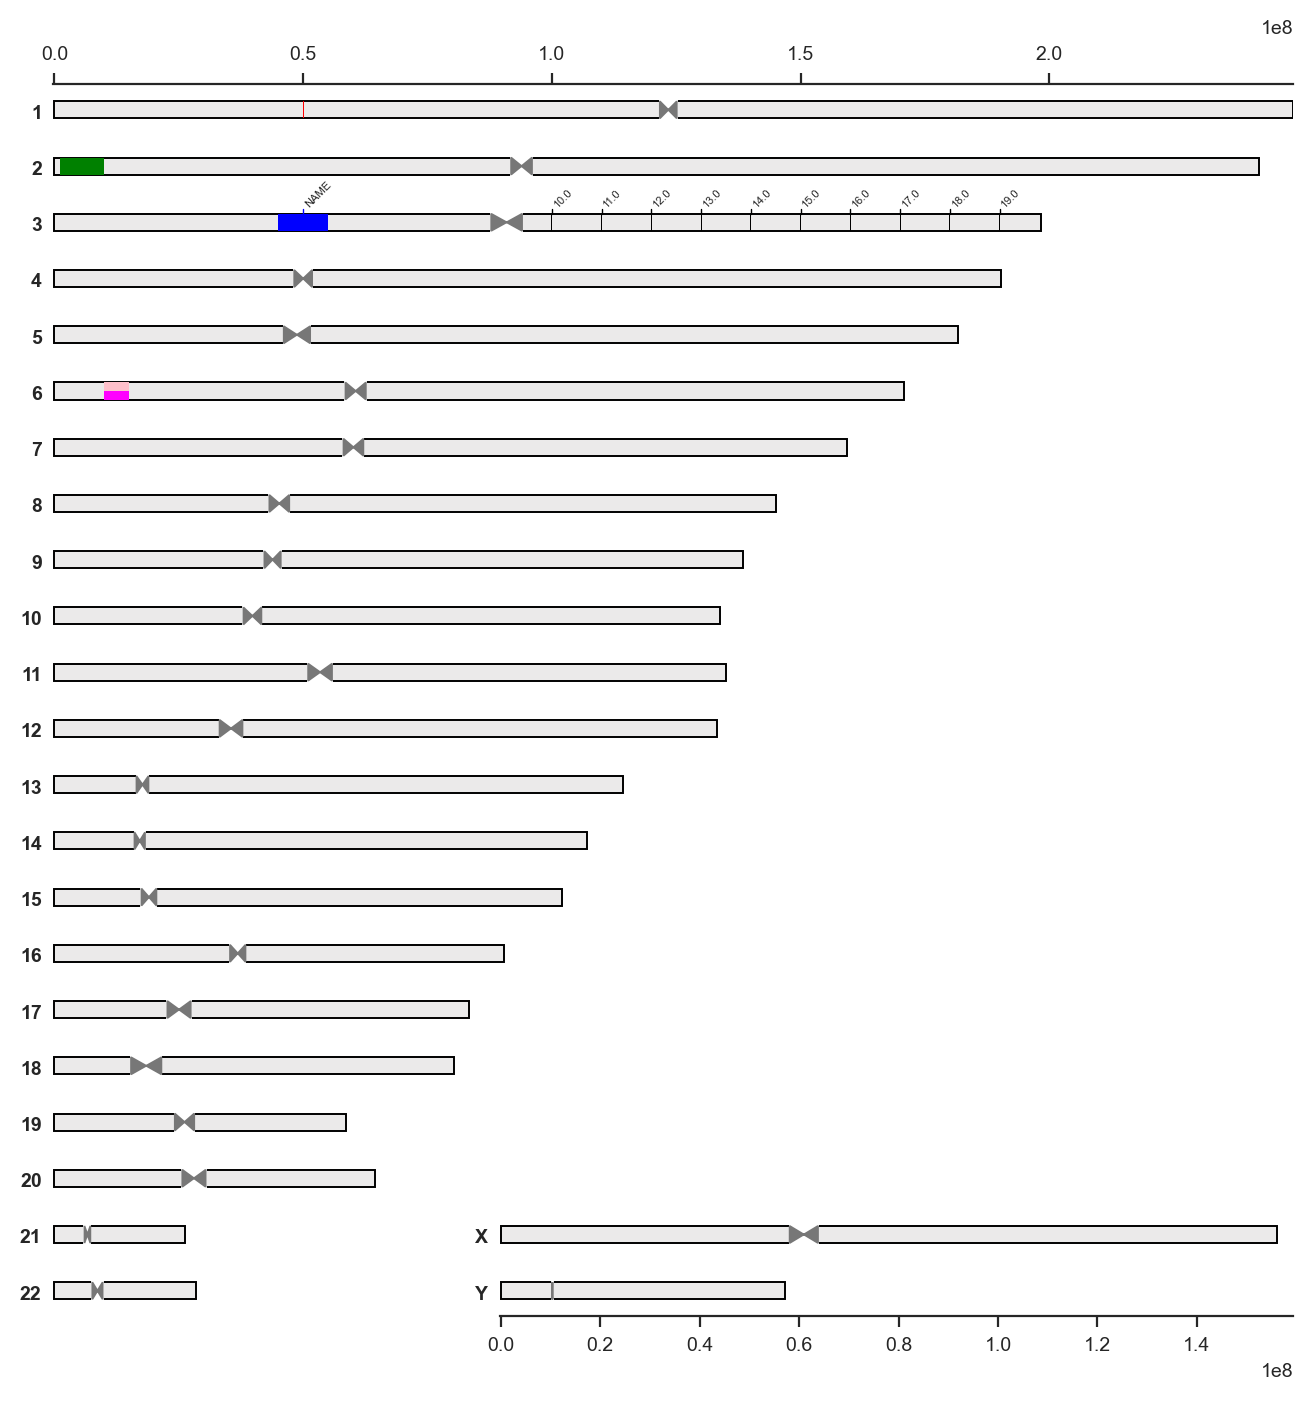

In [5]:
chrom = 'chr3'
start = 100000000
end = 200000000
width = 10000000
annotation2 = annotation + [(chrom, x[0], x[1], 'black', str(x[2]/width)) for x in zip(
    range(start, end, width), 
    range(start+1, end, width), 
    range(start, end, width)
)]
chrom_ideogram(annotation2, figsize=(8, 8))

In [6]:
gene_lists = gi.GoogleSheet()
print(gene_lists)

In [7]:
def gene_list_coords(gene_list):
    append_list = []
    for gene in gene_list:
        coord = gi.gene_coord(gene, assembly='hg38')
        if coord:
            chrom, start, end, strand = gi.gene_coord(gene, assembly='hg38')[gene]
            append_list.append((chrom, (start + end)/2, gene))
        else:
            print('skipped', gene)
    return append_list
    
xi_escape_genes = gene_lists.get('xi_escape')
# annot_xi_escape = gene_list_coords(xi_escape_genes)

sfari_genes = gene_lists.get('sfari_all_conf')
# annot_sfari_all_conf = gene_list_coords(sfari_genes)

cDEG_genes = gene_lists.get('cDEG')
# annot_cDEG_genes = gene_list_coords(cDEG_genes)

nDEG_genes = gene_lists.get('nDEG')
# annot_nDEG_genes = gene_list_coords(nDEG_genes)

spermatid_expr_genes = gene_lists.get('meritxell_spermatid_expr')
annot_spermatid_expr_genes = gene_list_coords(spermatid_expr_genes)

accel_reg_genes = gene_lists.get('accel_reg_simiiformes_br')
# annot_accel_reg_genes = gene_list_coords(accel_reg_genes)

skipped BHLHB9
skipped CA5BP1-CA5B
skipped CH17-340M24.3
skipped FAM104B
skipped FLJ44635
skipped IDS2
skipped LINC00893
skipped LINC00894
skipped LOC101928128
skipped LOC101928336
skipped LOC101928415
skipped LOC101928437
skipped LOC101928832
skipped LOC102724150
skipped LOC105373133
skipped LOC105373137
skipped LOC105373146
skipped LOC105373150
skipped LOC105373151
skipped LOC105373153
skipped LOC105373154
skipped LOC105373155
skipped LOC105373182
skipped LOC105373184
skipped LOC105373188
skipped LOC105373191
skipped LOC105373194
skipped LOC105373195
skipped LOC105373292
skipped LOC105373298
skipped LOC105373302
skipped LOC105373303
skipped LOC105373313
skipped LOC105373323
skipped LOC105373335
skipped LOC105373347
skipped LOC105373369
skipped LOC105373370
skipped LOC105373383
skipped LOC105373386
skipped LOC105373387
skipped LOC107985634
skipped LOC107985664
skipped LOC107985675
skipped LOC107985678
skipped LOC107985694
skipped LOC107985695
skipped LOC107985698
skipped LOC107985701


In [10]:
annot = annot_spermatid_expr_genes
annot = [a[:3] for a in annot if a[0] == 'chrX']
annot = sorted(list(set(annot)))

In [11]:
from geneinfo.utils import stairs
sample = 1000
Fs = 153000000
f = np.linspace(5, 50, sample)
x = np.linspace(0, Fs, sample)
y = np.sin(2* np.pi * f * x / Fs)
chrom = ['chrX']*sample
df = pd.DataFrame(dict(x=x, y=y, chrom=chrom)).sort_values('x')
df['start'] = df.x.shift()
df['end'] = df.x
df = df.iloc[1:-1, :]
df = stairs(df)
df.head()

,x,y,chrom,start,end,pos
1,153153.153153,0.031725,chrX,0.000000,153153.153153,0.000000
1,153153.153153,0.031725,chrX,0.000000,153153.153153,153153.153153
2,306306.306306,0.063984,chrX,153153.153153,306306.306306,153153.153153
2,306306.306306,0.063984,chrX,153153.153153,306306.306306,306306.306306
3,459459.459459,0.096740,chrX,306306.306306,459459.459459,306306.306306


NameError: name 'Axes' is not defined

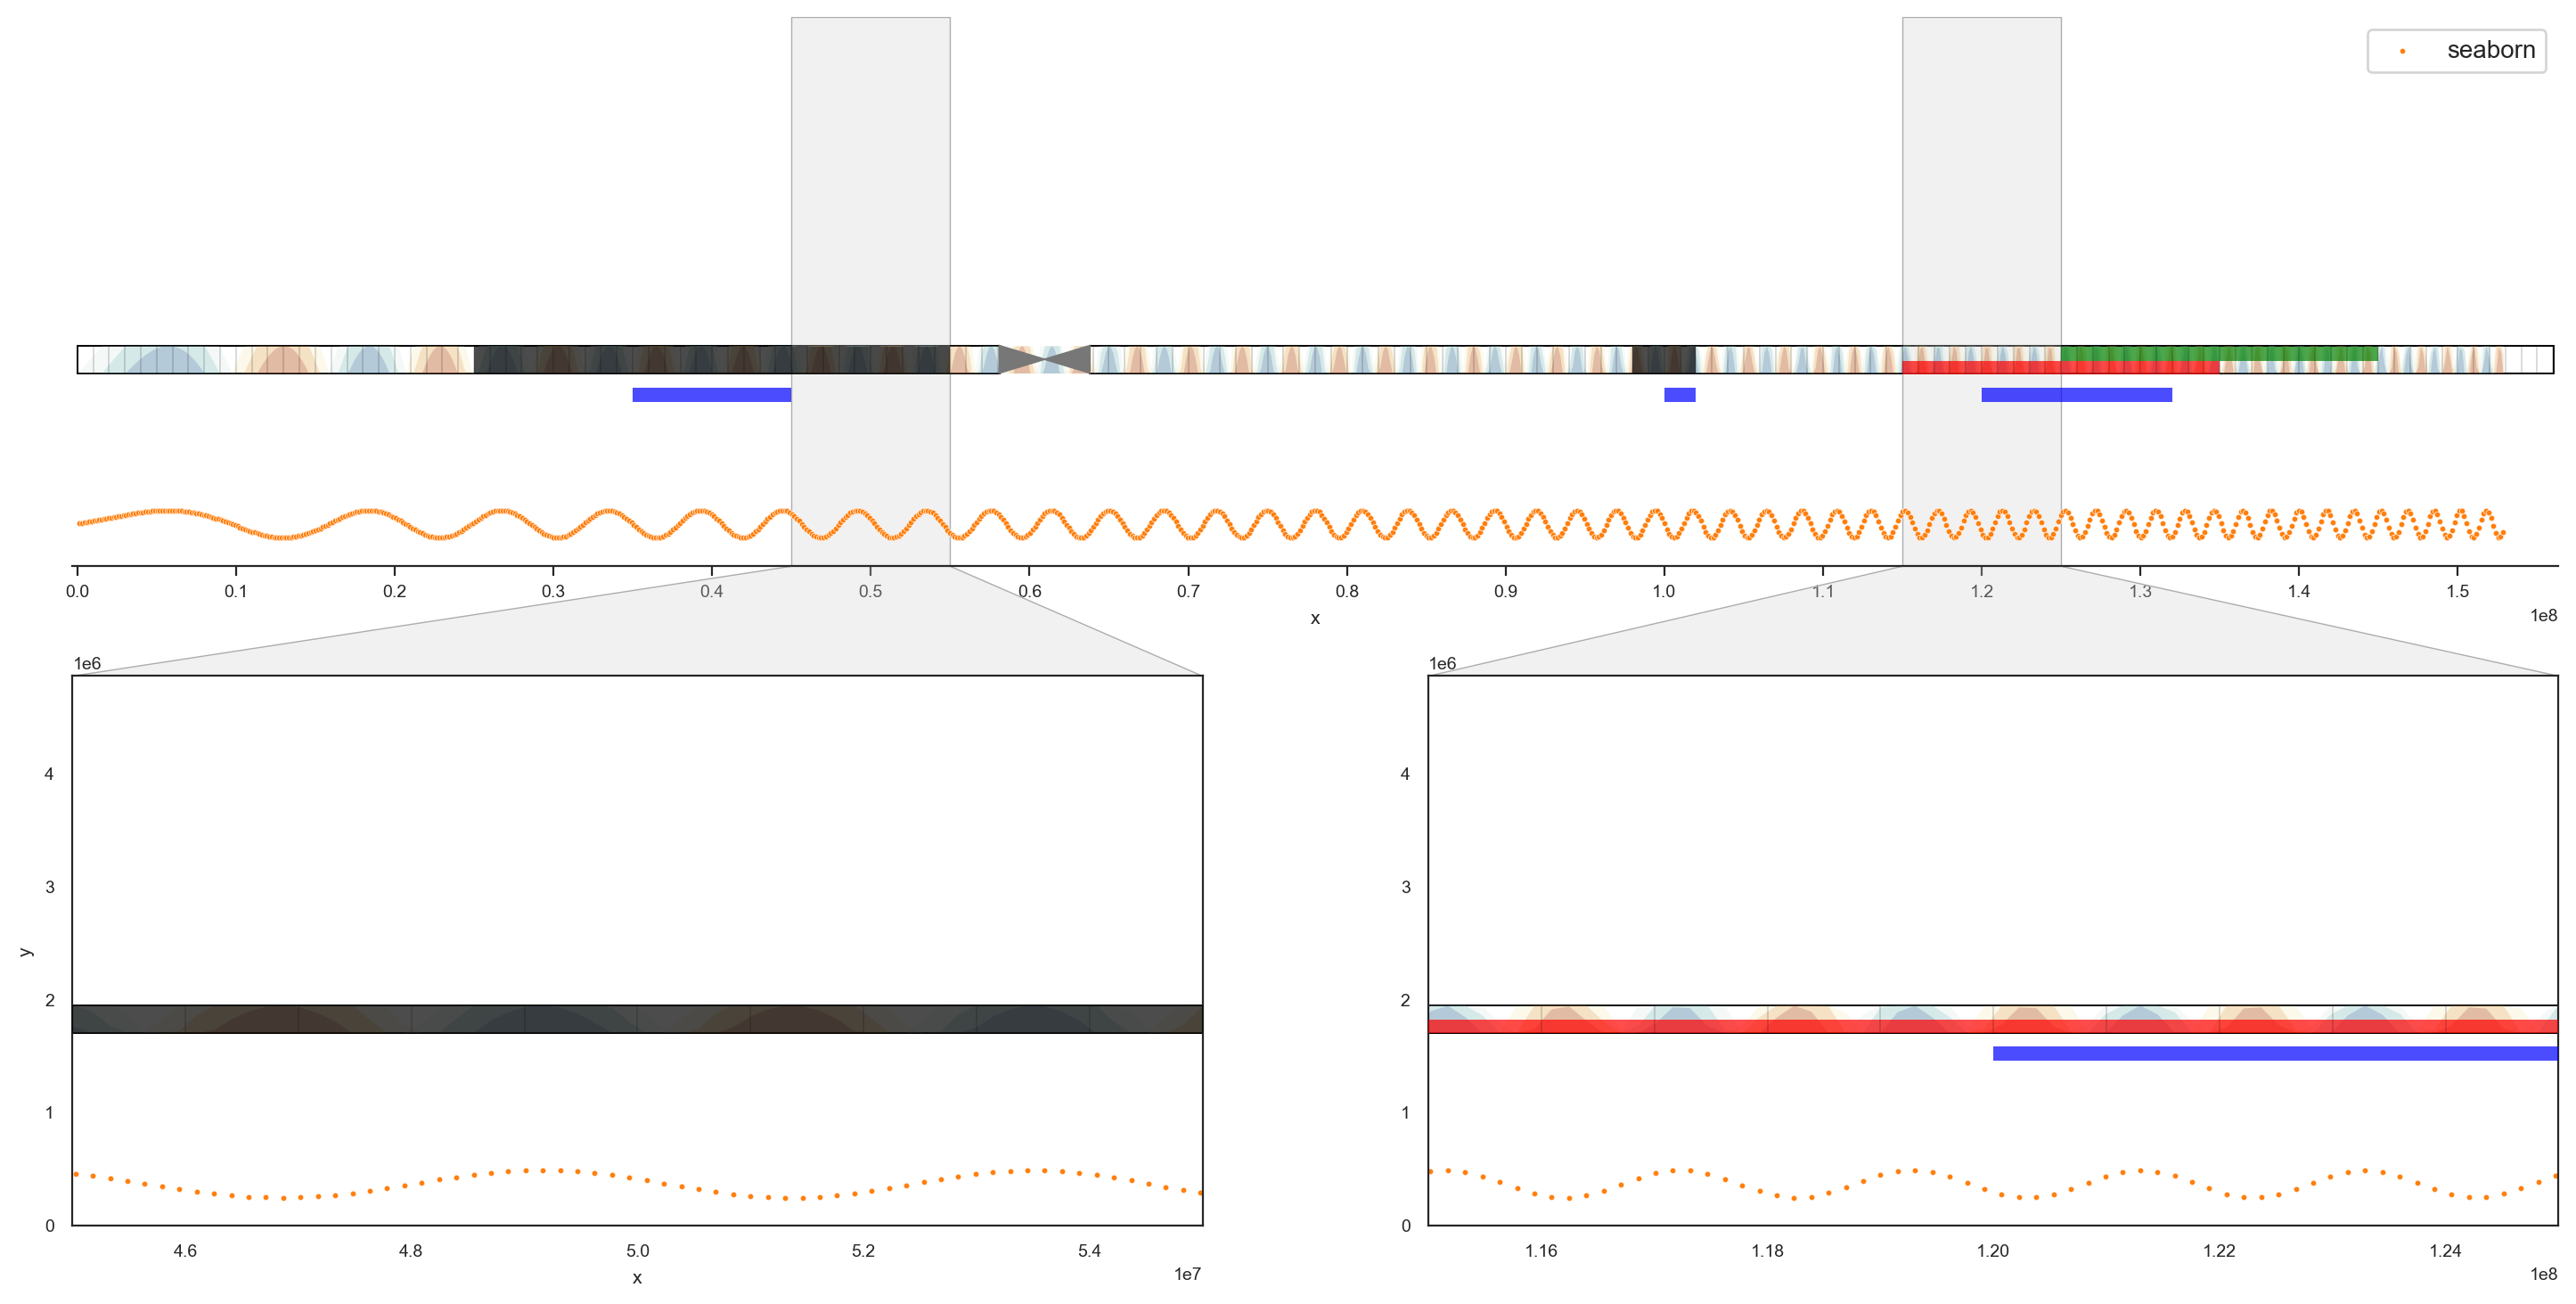

In [12]:
ci = ChromIdeogram('chrX', axes_width_inches=18, axes_height_inches=4, ylim=(0, 10), 
                   rel_font_height=0.01, hspace=0.2, wspace=None,
                   zooms=[(45_000_000, 55_000_000), 
                          # (65_000_000, 90_000_000), 
                           (115_000_000, 125_000_000),
                         ]) 

ci.draw_chromosomes(base=3.5, height=0.5, facecolor='none')

# ci.add_labels(annot, 
#               colored = xi_escape_genes,
#               bold = accel_reg_genes,
# #              italic = spermatid_expr_genes,
#               filled = cDEG_genes,
# #              bold = nDEG_genes + nDEG_genes,
#               # bold=['ZNF711', 'COX7B', 'PGK1'], 
#               # italic = ['TBX22'], 
#               # colored = ['NEXMIF', 'ATRX'],
#               # framed = ['MAOA', 'ATRX'],
#               # filled = ['PCDH19', 'ATRX'],
#              )

# ci.map_fun(horizonplot, data=df, x='x', y='y', offset=0, height=1000000)
ci.horizon(data=df, x='x', y='y', base=3.5, height=0.5, alpha=0.2)




ci.add_segments([('chrX', 25e6, 55e6), 
                 ('chrX', 98e6, 102e6)], label='segments', alpha=0.7)
ci.add_segments([('chrX', 115e6, 135e6)], facecolor='red', base=3.5, height=0.25, label='red segments', alpha=0.7)
ci.add_segments([('chrX', 125e6, 145e6)], facecolor='green', base=3.75, height=0.25, label='green segments', alpha=0.7)
ci.add_segments([('chrX', 35e6, 45e6), 
                 ('chrX', 100e6, 102e6), 
                 ('chrX', 120e6, 132e6)], facecolor='blue', base=3, height=0.25, label='blue segments', alpha=0.7)

ci.add_vlines()
ci.map_fun(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.5, 1), s=5, c='C1', label='seaborn')
ci.map_method(Axes.scatter, data=df, x='x', y='y', yaxis=(1.5, 2.4), s=5, c='C2', label='matplotlib')
ci.legend()

NameError: name 'add_lowess' is not defined

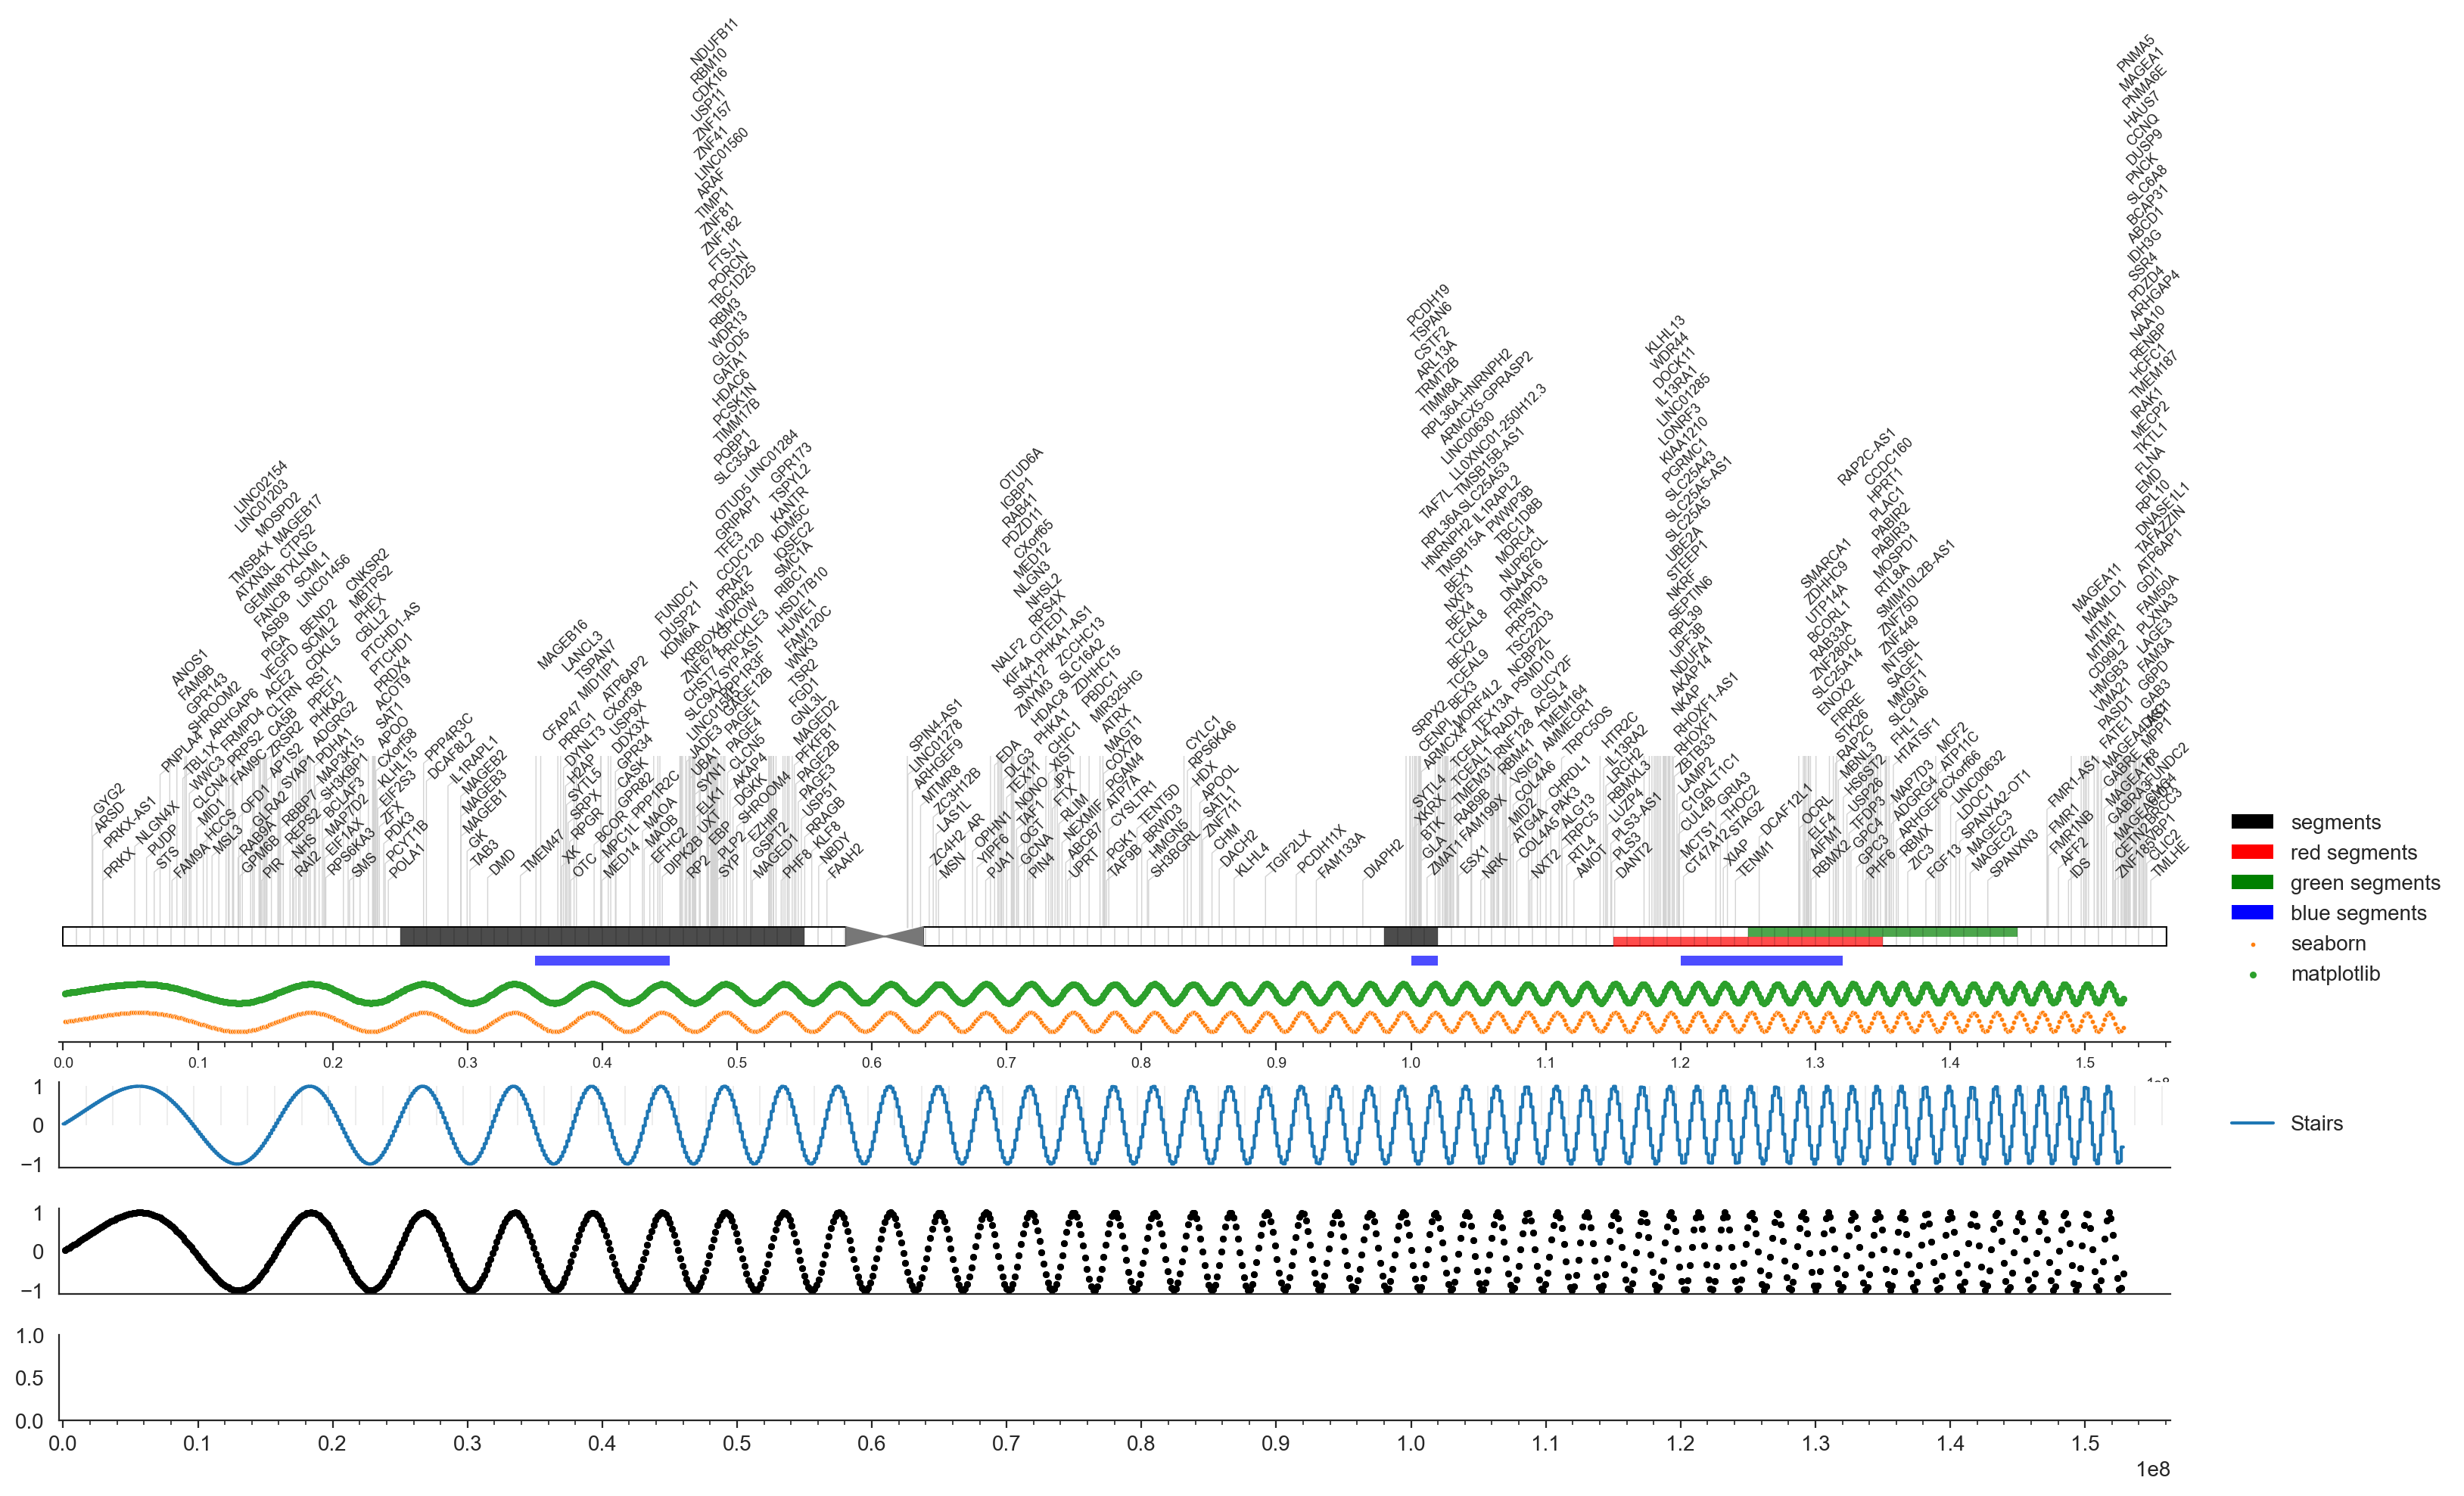

In [14]:
##########################################################################################
# interface
##########################################################################################

ci = ChromIdeogram('chrX', axes_width_inches=18, axes_height_inches=3, ylim=(0, 3), rel_font_height=0.03) # plots chromosome

# ci.draw_chromosomes(base=1, height=0.10, facecolor='lightgray')
ci.draw_chromosomes(base=1, height=0.20, facecolor='none')

ci.add_labels(annot)

ci.add_segments([('chrX', 25e6, 55e6), 
                 ('chrX', 98e6, 102e6)], label='segments', alpha=0.7)
ci.add_segments([('chrX', 115e6, 135e6)], facecolor='red', base=1, height=0.1, label='red segments', alpha=0.7)
ci.add_segments([('chrX', 125e6, 145e6)], facecolor='green', base=1.1, height=0.1, label='green segments', alpha=0.7)
ci.add_segments([('chrX', 35e6, 45e6), 
                 ('chrX', 100e6, 102e6), 
                 ('chrX', 120e6, 132e6)], facecolor='blue', base=0.8, height=0.1, label='blue segments', alpha=0.7)

ci.add_vlines()

# plot using function that takes data and column name keyword args for dimensions (like seaborn's sns.scatterplot)
ci.map_fun(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.1, 0.3), s=5, c='C1', label='seaborn')

from matplotlib.axes import Axes
# plot using matplotlib Axes method that x and y positional arguments (like matplotlib's Axes.scatter)
ci.map_method(Axes.scatter, data=df, x='x', y='y', yaxis=(0.4, 0.6), s=5, c='C2', label='matplotlib')

ci.legend()

##########################################################################################
# add axis
##########################################################################################

new_ax, new_ax2, new_ax3 = ci.add_axes(3, height_ratio=0.3, hspace=0.3)


new_ax.vlines(list(range(*map(int, new_ax.get_xlim()), 2_000_000)), *new_ax.get_ylim(), color='gray', linewidth=0.1)

# new_ax.plot(np.linspace(*new_ax.get_xlim(), 100), np.random.random(100), label='Line')
_df = stairs(df)
new_ax.plot(_df.pos, _df.y, label='Stairs')
new_ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize="10", frameon=False) ;

# new_ax2.scatter(np.linspace(*new_ax.get_xlim(), 100), np.random.random(100), s=5, label='Scatter')
new_ax2.scatter(df.x, df.y, s=5, c='black',label='Scatter')
add_lowess(df.x, df.y, ax=new_ax2, frac=0.02, c='red', label='Lowess')
new_ax2.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize="10", frameon=False) ;


horizonplot(df, y='y', ax=new_ax3)


##########################################################################################
# info annotation
##########################################################################################

from matplotlib.text import OffsetFrom
import textwrap

strs = "DYNLT3: lka dflaks dlfkajs ldkajs dlfkajsd fasdfasdfl lakjsd las dflasd jflaksdj flaksjdf laksdjf laksdjf a flaksdj fla"

annot_kwargs=dict(fontsize=5, ha="left", va="bottom",
             bbox=dict(
                 # fc="0.97", 
                 fc="w",
                 ec="red",
                       # alpha=0.2, 
                 linewidth=0.7),

    arrowprops=dict(
        facecolor='red', # color of arrow
        shrink=0.01, # distance from point
        width=1.5, # width of arrow
        headwidth=5, # width of arrow head
        headlength=7, # length of arrow head
        connectionstyle="angle3,angleA=0,angleB=-90", 
        # alpha=0.7,
    ) 
                  
             # arrowprops=dict(facecolor='red', arrowstyle="fancy", 
             #                 connectionstyle="angle3,angleA=0,angleB=-90", alpha=0.9)
                  
                 )

ci.ax.annotate(textwrap.fill(strs, 40), xy=(60000000, ci.map_y(1.2, ci.ax)), xytext=(30000000, ci.map_y(3.1, ci.ax)), xycoords="data", textcoords="data", **annot_kwargs)
           
ci.ax.annotate(textwrap.fill(strs, 40), xy=(120000000, ci.map_y(1.2, ci.ax)), xytext=(100000000, ci.map_y(3.1, ci.ax)), xycoords="data", textcoords="data", **annot_kwargs) ;

new_ax.annotate(textwrap.fill(strs, 40), xy=(0.8, 0.7), xytext=(800, 200), xycoords="axes fraction",
             textcoords=OffsetFrom(ax.bbox, (0, 0), "points"), **annot_kwargs) ;
